# Project- 4 Application of Clustering Models

In [ ]:
Problem Statement 2:
How many Unique patterns that exist in the historical stock data set, based onfluctuations in price.

Problem Statement 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read the csv data file
url= "C:\\Users\\shrik\\Downloads\\data_stocks.csv"
df= pd.read_csv(url)

In [2]:
df.shape

(41266, 502)

In [3]:
df.head(5)

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


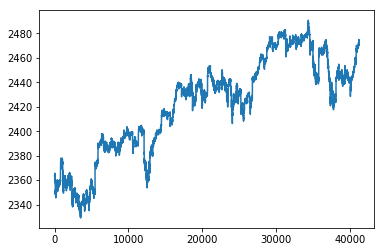

In [5]:
#plt.scatter([dfMat[1:,2]],[dfMat[2:,3]])
df1 = df.iloc[:,1:].values
df2 = df.iloc[:,1:]
#Plot the SP500 column from the above data
plt.plot(df1[:,0])

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit(df1)
X= pca.fit_transform(df1)
print(pca.explained_variance_)
print(pca.components_)

[ 30992.23830472   6868.52474964   3741.7543865 ]
We are Here
[[-0.21601455 -0.01315403 -0.01995395 ..., -0.02188381 -0.00364211
  -0.0160987 ]
 [-0.03075848 -0.01700272  0.01501107 ..., -0.00123491 -0.03899061
  -0.01593842]
 [ 0.04724604  0.00774066 -0.02521796 ..., -0.01560185  0.01876591
  -0.01637398]]


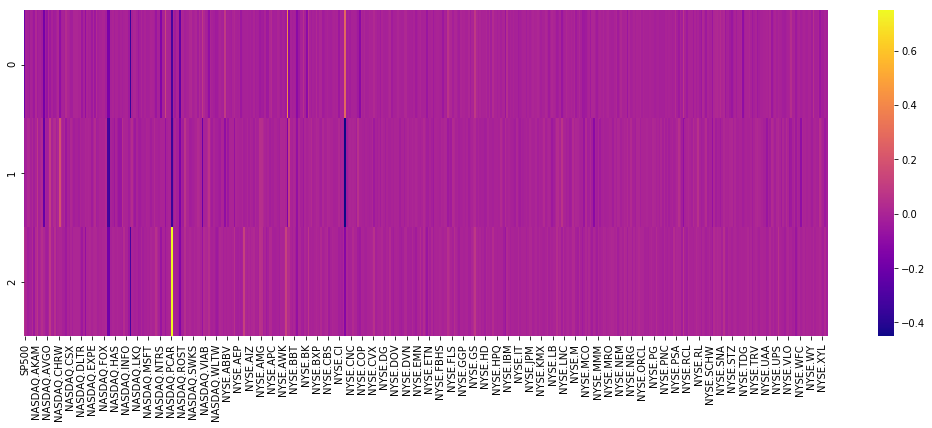

In [7]:
df3 = pd.DataFrame(pca.components_,columns=df2.columns)
import seaborn as sns
plt.figure(figsize=(18,6))
sns.heatmap(df3,cmap='plasma')

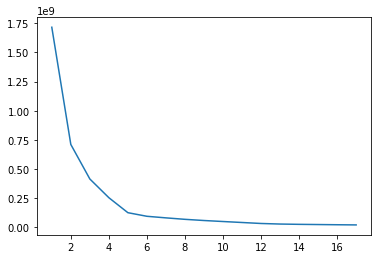

In [8]:
from sklearn.cluster import KMeans
y=[]
for i in range(1,18):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    y.append(km.inertia_)
plt.plot(range(1,18),y)
plt.show()

In [9]:
km=KMeans(n_clusters=5,init='k-means++',random_state=0)
km_pred=km.fit_predict(X)

In [10]:
km_pred

array([1, 1, 1, ..., 4, 4, 4])

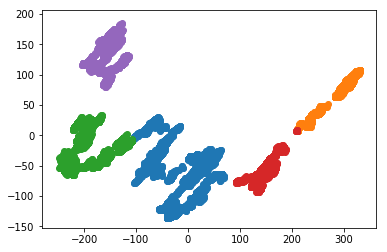

In [11]:
plt.scatter(X[km_pred==0,0],X[km_pred==0,1])
plt.scatter(X[km_pred==1,0],X[km_pred==1,1])
plt.scatter(X[km_pred==2,0],X[km_pred==2,1])
plt.scatter(X[km_pred==3,0],X[km_pred==3,1])
plt.scatter(X[km_pred==4,0],X[km_pred==4,1])